In [1]:
import re
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def get_data_from_fasta(path_to_fasta):
    uniprot_ids = []
    data = ''
    
    with open(path_to_fasta, 'rt') as fasta_file:
        for line in fasta_file:
            if line.startswith('>'):
                match = re.search(r'\|(.+)\|', line)
                
                if match:
                    uniprot_ids.append(match.group(1))
            data += line
        
    data_as_list = re.split(r'>.*\n', data)
    data_as_list = [sequence.replace('\n', '') for sequence in data_as_list if sequence]
    
    return uniprot_ids, data_as_list

In [3]:
clustalo_align = get_data_from_fasta("./clustalo_results.fasta")
muscle_align = get_data_from_fasta("./muscle_results.fasta")
mafft_align = get_data_from_fasta("./mafft_results.fasta")

In [4]:
def count_gaps(fasta_sequence):
    gaps = 0
    for letter in fasta_sequence:
        if letter == '-':
            gaps += 1
    return gaps

In [5]:
def count_longest_gap(fasta_sequence):
    longest_gap = 0
    counter = 0
    gap=0
    for letter in fasta_sequence:
        if letter == '-' and counter==1:
            gap += 1
        elif letter == '-' and counter==0:
            counter=1
            gap=0
        else:
            counter=0
            if longest_gap<gap:
                longest_gap = gap
    return longest_gap    

In [6]:
aligns = {"clustalo_align":clustalo_align, "muscle_align":muscle_align, "mafft_align":mafft_align}

Text(0.5, 1.0, 'Gaps')

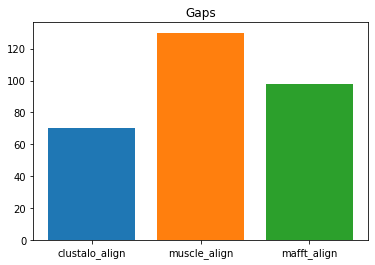

In [7]:
for name, align in aligns.items():
    gaps = sum([count_gaps(x[1]) for x in align])
    plt.bar(x=name, height=gaps)
plt.title("Gaps")

Text(0.5, 1.0, 'Longest Gap')

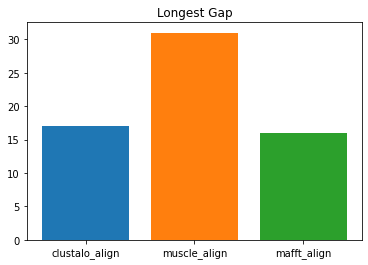

In [12]:
for name, align in aligns.items():
    longest_gap = max([count_longest_gap(x[1]) for x in align])
    plt.bar(x=name, height=longest_gap)
plt.title("Longest Gap")

In [13]:
def create_consensus_sequence(list_of_fasta_sequences):
    letters_list = []
    consensus = ''
    for i in range(len(list_of_fasta_sequences[0])):
        for sequence in list_of_fasta_sequences:
            letters_list.append(sequence[i])
        counter = Counter(letters_list)
        most_commons = counter.most_common()
        most_common_count = most_commons[0][1]
        more_than_one_most_common = '('
        if len(most_commons)>1:
            if most_commons[0][1] == most_commons[1][1]:
                for most_common in most_commons:
                    if most_common[1] == most_common_count:
                        more_than_one_most_common += most_common[0]+'/'
                else:
                    consensus += more_than_one_most_common[:-1] + ')'
                    letters_list = []
                    continue
        letters_list = []
        consensus += counter.most_common(1)[0][0]

    print(consensus)
    return consensus

In [14]:
for name, align in aligns.items():
    print(name+" consensus:")
    create_consensus_sequence([x for x in align[1]])
    print("\n")

clustalo_align consensus:
----------MGKIIGIDLGTTNSCVAVMEGGKPKVIENAEGARTTPSIIAYTDDG-ETLVGQPAKRQA-VTNP-KNTLFAIKRLIGRRFEDEEVQKDIK-IMPYKIVKADNGDAWVEVKGG-----KMAPPQISAEVLKKMKKTAEDYLGEPVTEAVITVPAYFNDAQRQATKDAGRIAGLEVKRIINEPTAAALAYGLDKKE----GDRTIAVYDLGGGTFDISIIEIA-VDGE-KQFEVLATNGDTFLGGEDFDNRLINYLVDEFKKEQ-GIDLRNDPLALQRLKEAAEKAKIELSSAQQTEVNLPYITADA----TGPKHLNIKLTRAKLESLVEDLVERTIEPCKVALKDAGLSV-SDIDDVILVGGQTRMPKVQEKVKEFFG-KEPRKDVNPDE-AVAIGAAIQGGVLSG--DVKDVLLLDVTPLSLGIETLGGVMTKLIEKNTTIPTKKSQVFSTAEDNQSAVTIHVLQGEREMAADNKSLGQFNLEGIPPAPRGMPQIEVTFDIDANGILHVSAKDKATGKEQKITIKASSGLSEEEIEKMVKDAEANAEEDKKFEELVQARNQADALVHSTRKSLEEAGD-KLPADEKEAIEAALKALE(E/T)ALKG--E-DKAAIEAKTQALAQASQKLGEAMYAQQQAQQG-----------------------A-AAAKKDDDVVDAEFEEVKDDK------------


muscle_align consensus:
----MG------KI-IGIDLGTTNSCVAVMEGGKPKVIENAEGARTTPSIIAY-TDDG-ETLVGQPAKR-QAVTNPKN-TLFAIKRLIGRRFEDEEVQKDI-KIMPYKIVKADNGDAWVEVKG-----KKMAPPQISAEVLKKMKKTAEDYLGEPVTEAVITVPAYFNDAQRQATKDAGRIAGLEVKRIINEPTAAALAYGLDK---KKG-DRTIAVYDLGGGTFDISIIEIAEVD

In [15]:
print("Sekwencja X przebadana w BLAST to \"Transcription Factor AP-2-beta\"")

Sekwencja X przebadana w BLAST to "Transcription Factor AP-2-beta"
